---
Total Wildfires in the USA from 1992 to 2015
--
1. There has been a decrease in the total number of wildfires each year. 
2. However, there has been an increase in the totals for certain states, particularly in the mid-south to south-east.  
3. Most notably, Georgia, Texas, and Mississpippi had the most wildfires during this time.  

---
Sources: 
---
1. https://www.kaggle.com/rtatman/188-million-us-wildfires/kernels 
2. https://plot.ly/python/choropleth-maps/#united-states-choropleth-map
3. https://ezgif.com/apng-maker

In [16]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go


In [105]:
# Load data
fp = "../Resources/Fire_Data_Over_1.csv"

map_df = pd.read_csv(fp)

map_df.head()

,Unnamed: 0,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY
0,13,14,TIGER,2004,2453276.5,272,1200.0,4.0,Campfire,6.0,B,38.433333,-120.510000,CA,5
1,16,17,POWER,2004,2453284.5,280,1415.0,2.0,Equipment Use,16823.0,G,38.523333,-120.211667,CA,5
2,17,18,FREDS,2004,2453291.5,287,1618.0,2.0,Equipment Use,7700.0,G,38.780000,-120.260000,CA,17
3,24,25,EAGLE,2004,2453187.5,183,1712.0,1.0,Lightning,2.5,B,33.545278,-105.229444,NM,27
4,25,26,BACHELOR,2004,2453206.5,202,1405.0,1.0,Lightning,10.0,C,33.315833,-105.512222,NM,27


In [18]:
# Remove Puerto Rico since it won't show up on our map

new = map_df.loc[(map_df.loc[:,'STATE']!='PR')]
new.head()

,Unnamed: 0,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY
0,13,14,TIGER,2004,2453276.5,272,1200.0,4.0,Campfire,6.0,B,38.433333,-120.510000,CA,5
1,16,17,POWER,2004,2453284.5,280,1415.0,2.0,Equipment Use,16823.0,G,38.523333,-120.211667,CA,5
2,17,18,FREDS,2004,2453291.5,287,1618.0,2.0,Equipment Use,7700.0,G,38.780000,-120.260000,CA,17
3,24,25,EAGLE,2004,2453187.5,183,1712.0,1.0,Lightning,2.5,B,33.545278,-105.229444,NM,27
4,25,26,BACHELOR,2004,2453206.5,202,1405.0,1.0,Lightning,10.0,C,33.315833,-105.512222,NM,27


In [19]:
# Sort by year ascending 

df = new.sort_values(["FIRE_YEAR", "STATE"])
df.dropna(how="any")
df = df.reset_index(drop=True)
df.head()

,Unnamed: 0,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY
0,53189,53637,NaN,1992,2448753.5,132,730.0,5.0,Debris Burning,2.0,B,60.500000,-149.866667,AK,NaN
1,53190,53638,NaN,1992,2448754.5,133,1301.0,5.0,Debris Burning,40.0,C,60.500000,-149.866667,AK,NaN
2,53193,53641,NaN,1992,2448772.5,151,2030.0,9.0,Miscellaneous,2.5,B,60.733333,-149.383333,AK,NaN
3,53197,53645,NaN,1992,2448777.5,156,1504.0,5.0,Debris Burning,2.0,B,60.183333,-149.333333,AK,NaN
4,173288,175112,NaN,1992,2448783.5,162,1830.0,12.0,Structure,27.0,C,61.849300,-156.352300,AK,NaN


In [135]:
# Simplify to two columns and count number of wildfires in each year

group_df = df[['FIRE_YEAR','STATE']]
state_totals = list(df.groupby("STATE")["FIRE_YEAR"].count())
years = df.groupby("FIRE_YEAR")
year_totals = years["FIRE_YEAR"].count()

group_df.head()

,FIRE_YEAR,STATE
0,1992,AK
1,1992,AK
2,1992,AK
3,1992,AK
4,1992,AK


In [136]:
# Make a unique data frame to pull unique states

unique_df = group_df.drop_duplicates().reset_index(drop=True)
unique_states = group_df.loc[group_df["FIRE_YEAR"] == 2015].drop_duplicates().reset_index(drop=True)

unique_df.head()

,FIRE_YEAR,STATE
0,1992,AK
1,1992,AL
2,1992,AR
3,1992,AZ
4,1992,CA


In [137]:
# Make a df of totals for the years

years = list(range(1992,2016))

years_df = pd.DataFrame({
    "Year": years,
    "Totals": year_totals
})
years_df["Totals"] = years_df["Totals"].map("{:,}".format)
years_df.head()

,Year,Totals
FIRE_YEAR,,
1992,1992,"26,425"
1993,1993,"25,727"
1994,1994,"29,789"
1995,1995,"29,969"
1996,1996,"32,886"


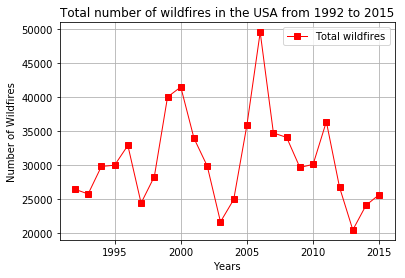

In [138]:
#Make a line graph with this data

wildfire, = plt.plot(years,year_totals, marker="s", color="Red", linewidth=1, label="Total wildfires") 
plt.legend(loc="best") 
plt.grid()

plt.title("Total number of wildfires in the USA from 1992 to 2015")
plt.xlabel("Years")
plt.ylabel("Number of Wildfires")

plt.savefig("graphs/total_wildfires_years.png")
plt.show()

In [116]:
# Make a df of totals for the states

states = unique_states["STATE"]

states_df = pd.DataFrame({ 
    "States": states, 
    "Totals": state_totals
})
states_df = states_df.sort_values(["Totals"], ascending=False).reset_index(drop=True)

#pick out the top 10 states

top_10 = pd.DataFrame({
    "States": states_df["States"][0:9],
    "Totals": states_df["Totals"][0:9]
}) 

top_10

,States,Totals
0,GA,74555
1,TX,73300
2,MS,55729
3,FL,48202
4,AL,44588
5,SC,43719
6,CA,39563
7,NC,35088
8,OK,32655


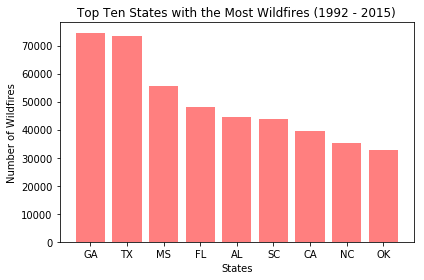

In [122]:
# Set x axis and tick locations

top_10_states = top_10["States"]
x_axis = np.arange(len(top_10))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space

plt.bar(x_axis, top_10["Totals"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, top_10_states)

# Set x and y limits

# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, max(state_totals)+10000)

# Set a Title and labels

plt.title("Top Ten States with the Most Wildfires (1992 - 2015)")
plt.xlabel("States")
plt.ylabel("Number of Wildfires")

# Save our graph and show the graph

plt.tight_layout() 
plt.savefig("graphs/total_wildfires_states.png")
plt.show()

In [94]:
# Get the number of wildfires in each year in each state

df = df[["FIRE_YEAR", "STATE"]]
totals = list(df.groupby(["FIRE_YEAR", "STATE"])["STATE"].count())
unique_df["Totals"] = totals
unique_df.head()

,FIRE_YEAR,STATE,Totals
0,1992,AK,133
1,1992,AL,58
2,1992,AR,89
3,1992,AZ,936
4,1992,CA,2299


In [95]:
# Use pd.pivot_tableto make a new dataframe 

unique_df = pd.pivot_table(unique_df, values = 'Totals', index=['STATE'], columns = 'FIRE_YEAR').reset_index()
unique_df.head()

FIRE_YEAR,STATE,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,AK,133.0,254.0,205.0,92.0,191.0,254.0,73.0,165.0,102.0,...,80.0,223.0,114.0,195.0,310.0,128.0,144.0,201.0,78.0,403.0
1,AL,58.0,96.0,2331.0,2715.0,2707.0,1643.0,2314.0,2849.0,4125.0,...,2980.0,2585.0,1374.0,1024.0,2114.0,1516.0,1052.0,996.0,1366.0,1183.0
2,AR,89.0,88.0,98.0,149.0,147.0,716.0,730.0,1457.0,1578.0,...,1883.0,935.0,583.0,829.0,1600.0,1672.0,1555.0,561.0,958.0,868.0
3,AZ,936.0,1733.0,1201.0,1430.0,720.0,347.0,547.0,518.0,689.0,...,750.0,387.0,341.0,560.0,284.0,460.0,412.0,335.0,291.0,323.0
4,CA,2299.0,2092.0,2038.0,1788.0,2398.0,1658.0,1470.0,1947.0,1399.0,...,1921.0,1674.0,1743.0,1247.0,1135.0,1597.0,1297.0,1489.0,938.0,1134.0


In [125]:
# Now to make cloropleth map using the plotly library and API

for col in states_df.columns:
    states_df[col] = states_df[col].astype(str)

# Select the colors for the gradient     
scl = [[0.0, 'rgb(255,215,0)'],
       [0.2, 'rgb(255,165,0)'],
       [0.4, 'rgb(255,140,0)'],
       [0.6, 'rgb(255,115,0)'],
       [0.8, 'rgb(200,50,0)'],
       [1.0, 'rgb(139,0,0)']]

#Load the dictionary for a choropleth map 
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = states_df['States'],
        z = states_df["Totals"],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Wildfires")
        ) ]

# Add title and labels 
layout = dict(
        title = 'USA Wildfires 1992-2015 </br></br>Source: Kaggle',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

# Show the map 
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

---
Sources: 
---
1. https://www.kaggle.com/rtatman/188-million-us-wildfires/kernels 
2. https://plot.ly/python/choropleth-maps/#united-states-choropleth-map
3. https://ezgif.com/apng-maker